<h2><b>Credit card fraud detection using decision tree<b></h2>

Import necessary library

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pylab as plt

<h3><b>Dataset</b></h3>
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [11]:
data=pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.shape

(284807, 31)

Preprocess the following data by excluding Time feature from the dataset and normalize it

In [13]:
from sklearn import preprocessing
X=data[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']].values
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.69424232, -0.04407492,  1.6727735 ,  0.97336551, -0.24511658,
         0.34706795,  0.19367894,  0.08263728,  0.33112778,  0.08338555,
        -0.54040704, -0.61829572, -0.99609892, -0.32461019,  1.60401384,
        -0.53683287,  0.24486345,  0.03076993,  0.49628203,  0.32611802,
        -0.02492336,  0.38285444, -0.17691133,  0.11050692,  0.24658544,
        -0.39217043,  0.33089162, -0.06378115,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 ,  0.31652293,  0.04348335,
        -0.06181997, -0.06370021,  0.07125348, -0.23249419, -0.15334963,
         1.58000285,  1.06608857,  0.4914182 , -0.14998248,  0.69436042,
         0.52943375, -0.13516997, -0.21876258, -0.17908605, -0.08961086,
        -0.3073768 , -0.88007675,  0.16220118, -0.56113055,  0.3206939 ,
         0.26106948, -0.02225568,  0.04460752, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849,  0.26823129, -0.36457179,
         1.35145359,  0.63977564,  0.20737273, -1.37867535,  0.19069961,
  

In [14]:
y=data['Class']
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Use train/test split method, here 70% of dataset will be used to train and 30% but since the dataset is highly unbalanced we have to bias the model to pay more attention to the samples in the minority class.

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_test.shape)
print(y_test.shape)

(85443, 29)
(85443,)


BUILD MODEL

In [16]:
classTree=DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=42,max_depth=4)
classTree
classTree.fit(X_train,y_train)
pred=classTree.predict(X_test)
print(pred [0:5])
print(y_test[0:5])

[1 0 0 0 0]
43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64


TEST ACCURACY

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(y_test,pred))

Accuracy =  0.9738656180143488


[[  119    17]
 [ 2216 83091]]


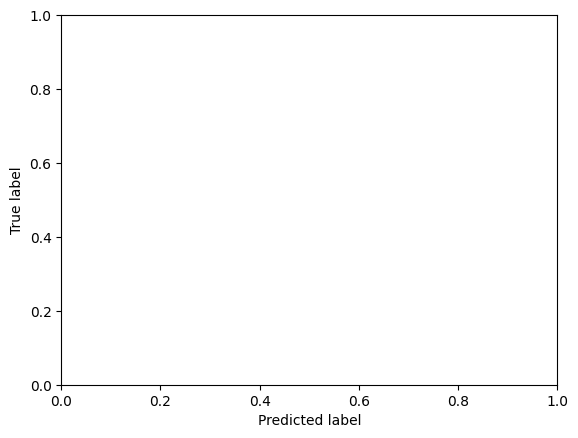

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
  else:
        print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(confusion_matrix(y_test,pred , labels=[1,0]))

Normalized confusion matrix
[[0.88 0.12]
 [0.03 0.97]]


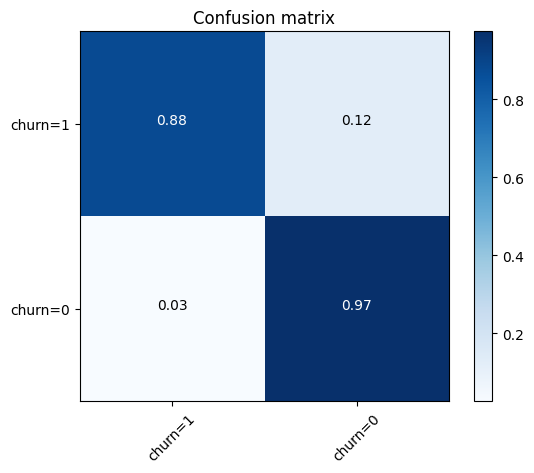

In [20]:
cnf_matrix = confusion_matrix(y_test, pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= True,  title='Confusion matrix')